# 0. Tạo danh sách cách từ stopword, viết tắt

các từ viết tắt hay xuất hiện trên mạng xã hội

In [1]:
vietnamese_teen_slang = {
    # Từ viết tắt cơ bản
    "đc": "được",
    "dc": "được", 
    "k": "không",
    "ko": "không",
    "kg": "không",
    "kh": "không",
    "khg": "không",
    "cx": "cũng",
    "cg": "cũng",
    "nx": "nữa", 
    "nz": "nữa",
    "r": "rồi",
    "z": "rồi",
    "zồi": "rồi",
    "zì": "gì",
    "j": "gì",
    "gj": "gì",
    "mk": "mình",
    "vk": "vợ",
    "vc": "vãi cả",
    "mìk": "mình",
    "t": "tao",
    "tao": "tao", 
    "m": "mày",
    "may": "mày",
    "b": "bạn",
    "tn": "thế này",
    "bn": "bạn",
    "e": "em",
    "a": "anh",
    "c": "chị",
    "vs": "với",
    "w": "với",
    "v": "vậy",
    "chs": "chơi",
    "ch": "chưa",
    "chx": "chưa",
    "ntn": "như thế nào",
    "stn": "sao thế này",
    "tbn": "thế bạn",
    "h": "giờ",
    "bh": "bây giờ",
    "lh": "liên hệ",
    "ns": "nói",
    "nc": "nước",
    "nch": "nói chuyện",
    "ncl": "nói chung là",
    "nc": "nói chuyện",
    "xl": "xin lỗi",
    "sr": "sorry",
    "tks": "thanks",
    "cảm ơn": "cảm ơn",
    "ty": "thank you",
    "thx": "thanks",
    "aui": "anh yêu",
    "ô": "ông",
    "csgt": "cảnh sát giao thông",
    "hv": "học viện",
    "cntt": "công nghệ thông tin",
    "mn": "mọi người",
    "mng": "mọi người",
    
    # Từ teen phổ biến
    "tml": "thằng mặt lồn",
    "đm": "địt mẹ",
    "dm": "đijt mẹ",
    "wtf": "cái địt",
    "omg": "ôi trời ơi",
    
    
    # Từ toxic/chửi thề (cho bài toán phân loại toxic)
    "vcl": "vãi cả lồn",
    "vl": "vãi lồn", 
    "cc": "cặc",
    "cl": "cái lồn",
    "clm": "cái lồn mẹ",
    "cmm": "con mẹ mày",
    "cmn": "con mẹ nó",
    "cmnr": "con mẹ nó rồi",
    "dcm": "địt con mẹ",
    "dcmm": "địt con mẹ mày",
    "dcmn": "địt con mẹ nó", 
    "đcm": "địt con mẹ",
    "đcmm": "địt con mẹ mày",
    "lz": "lồn",
    "l": "lồn",
    "lol": "lồn",
    "nml": "não mẹ lồn",
    "nmn": "não mẹ nó",
    "nmm": "não mẹ mày",
    "vkl": "vãi ka lồn",
    "voz": "vãi lồn", 
    "shit": "địt",
    "fuck": "địt",
    "fk": "địt",
    "damn": "chết tiệt",
    "bitch": "con đĩ",
    "asshole": "thằng lồn",
    "stupid": "ngu",
    "idiot": "ngu",
    "retard": "khùng",
    "gay": "đồng tính",
    "die": "chết đi",
    "kill": "giết",
    "hate": "ghét",
    "ugly": "xấu",
    "fat": "béo",
    "loser": "thất bại",
    "noob": "thua kém",
    "trash": "rác",
    "cancer": "ung thư",
    "toxic": "độc hại",
    
    # Từ toxic tiếng Việt
    "ngu": "ngu",
    "khùng": "khùng",
    "điên": "điên", 
    "đần": "đần",
    "tởm": "tởm",
    "ghê": "ghê",
    "dở": "dở",
    "tệ": "tệ",
    "tồi": "tồi",
    "rác": "rác",
    "shit": "cứt",
    "fck": "địt",
    "fuk": "địt",
    "dam": "chết tiệt",
    "hell": "địa ngục",
    
    # Từ viết tắt toxic
    "fku": "địt mẹ mày",
    "fucku": "địt mẹ mày",
    "fuck you": "địt mẹ mày",
    "suck my dick": "bú cặc tao",

    
    # Từ xúc phạm nhẹ
    "suck": "tệ",
    "đúng z": "đúng rồi",
    "oke": "okay",
    "okie": "okay",
    "ok": "okay",
    "okela": "okay",
    "roài": "rồi",
    "zậy": "vậy",
    "zị": "gì",
    "zàng": "gì vậng",
    "zề": "gì thế",
    "zay": "vậy",
    "uk": "ừ",
    "uh": "ừ",
    "uhm": "ừm",
    "hm": "hmm",
    "hihi": "cười",
    "hehe": "cười",
    "huhu": "khóc",
    "hoho": "cười",
    
    # Từ mạng xã hội
    "flex": "khoe khoang",
    "chill": "thư giãn",
    "slay": "xuất sắc",
    "ship": "ghép đôi",
    "crush": "người thích",
    "babe": "người yêu",
    "bff": "bạn thân mãi mãi",
    "simp": "dại gái",
    "toxic": "độc hại",
    "red flag": "tín hiệu nguy hiểm",
    "green flag": "tín hiệu tích cực",
    
    # Từ game/internet
    "gg": "good game",
    "ez": "dễ ợt",
    "noob": "nghiệp dư",
    "pro": "chuyên nghiệp", 
    "lag": "giật",
    "bug": "lỗi",
    "hack": "gian lận",
    "tryhard": "cố gắng hết mức",

    
    # Từ mới xuất hiện
    "fire": "xuất sắc",
    
    # Từ viết tắt khác
    "nt": "như thế",
    "bt": "bình thường",
    "vt": "vậy thì",
    "đt": "điện thoại",
    "fb": "facebook",
    "ig": "instagram", 
    "tt": "tiktok",
    "yt": "youtube",
    "zl": "zalo",
    "mess": "messenger",
    "vib": "vietinbank",
    "tech": "techcombank",
    "vcb": "vietcombank",
    "mb": "mbbank",
    "tp": "thành phố",
    "q": "quận",
    "p": "phường",
    "st": "street",
    "rd": "road",
    "snvv": "sinh nhật vui vẻ",
    
    # Từ cảm xúc
    "uwu": "dễ thương",
    "owo": "ngạc nhiên",

    
    # Từ thời gian
    "gl": "good luck",

}

các từ dừng hay xuất hiện

In [3]:
vietnamese_stopwords = [
    # Đại từ nhân xưng
    "tôi", "bạn", "anh", "chị", "em", "ông", "bà", "cô", "chú", "cậu",
    "mình", "ta", "chúng ta", "chúng tôi", "các bạn", "họ", "nó",
    "tự", "ai", "gì", "nào", "sao", "thế nào", "như thế nào", "mày",
    "tao",

    
    # Từ chỉ định
    "này", "đó", "kia", "đây", "đấy", "kìa", "nọ",
    
    # Giới từ
    "của", "với", "cho", "tại", "trong", "ngoài", "trên", "dưới",
    "về", "đến", "từ", "theo", "sau", "trước", "giữa", "bên",
    "cùng", "nhờ", "bởi", "do", "vì", "để", "mà", "như",
    
    # Liên từ
    "và", "hay", "hoặc", "nhưng", "song", "mặc dù", "tuy", "dù",
    "nếu", "giả sử", "khi", "lúc", "hồi", "thuở", "tức là",
    "nghĩa là", "tức", "tuy nhiên", "tuy thế", "thế nhưng",
    
    # Từ hỏi
    "làm sao", "ra sao", "thế nào", "như nào", "bao giờ", "khi nào",
    "ở đâu", "tại sao", "vì sao", "tại làm sao", "bằng cách nào",
    
    # Trợ động từ
    "là", "thì", "mà", "rồi", "đã", "sẽ", "có thể", "phải",
    "nên", "được", "bị", "vẫn", "vẫn còn", "còn", "đang",
    "sắp", "vừa", "mới", "cũng", "cùng", "chỉ", "chỉ có",
    
    # Từ định lượng
    "nhiều", "ít", "vài", "mấy", "bao nhiêu", "tất cả", "toàn bộ",
    "cả", "mọi", "từng", "mỗi", "một số", "phần lớn", "đa số",
    "thiểu số", "một phần", "hầu hết", "gần như", "hơn", "dưới",
    
    # Từ thời gian
    "hôm nay", "ngày mai", "hôm qua", "tuần này", "tháng này",
    "năm này", "hiện tại", "bây giờ", "lúc này", "khi đó",
    "lúc đó", "thuở đó", "ngày xưa", "xưa kia", "sau này",
    
    # Từ nối, từ tình thái
    "thật", "thực", "quả", "đúng", "rõ", "rất", "khá", "hơi",
    "tương đối", "khôn", "lắm", "quá", "cực", "cực kỳ",
    "vô cùng", "hết sức", "đặc biệt", "nhất là", "đúng là",
    
    # Các từ khác thường gặp
    "về phần", "về mặt", "theo như", "như vậy", "thế thôi",
    "vậy thôi", "chỉ thế", "có lẽ", "chắc", "chắc chắn",
    "dĩ nhiên", "tất nhiên", "đương nhiên", "hiển nhiên",
    "rõ ràng", "hẳn", "nhất định", "chắc hẳn",
    
    # Từ kết thúc câu
    "thôi", "vậy", "đó", "mà thôi", "à", "ạ", "ư", "hử",
    "nhé", "nha", "ha", "hehe", "hihi",
    
    # Từ phổ biến khác
    "việc", "chuyện", "công việc", "vấn đề", "vần đề", "điều",
    "cái", "con", "chiếc", "cuốn", "quyển", "bức", "bài",
    "người", "thằng", "con người", "ai đó", "có người",
    "gia đình", "nhà", "quê", "quê hương", "đất nước",
    
    # Từ cảm thán không phủ định
    "ôi", "ối", "ơi", "ừ", "ờ", "à", "ạ", "ư", "hử",
    "wow", "wao", "chà", "trời", "trời ơi", "chao ôi",
    
    # Từ chỉ mức độ
    "hơn hẳn", "kém", "bằng", "ngang", "thua", "thắng",
    "cao", "thấp", "lớn", "nhỏ", "to", "bé", "dài", "ngắn",
    
    # Từ chỉ phương hướng
    "lên", "xuống", "vào", "ra", "qua", "lại", "lui",
    "tới", "đi", "về", "lại đây", "ra đó", "vào trong",
    
    # Số đếm cơ bản
    "một", "hai", "ba", "bốn", "năm", "sáu", "bảy", "tám", "chín", "mười",
    "trăm", "nghìn", "triệu", "tỷ", "đầu tiên", "thứ hai", "thứ ba",
    
    # Từ khẳng định (không phủ định)
    "ừ", "ờ", "đúng", "phải", "được", "ok", "oke", "okie",
    
    # Từ chỉ thời điểm
    "sáng", "chiều", "tối", "đêm", "trưa", "sớm", "muộn",
    "Thứ Hai", "Thứ Ba", "Thứ Tư", "Thứ Năm", "Thứ Sáu", "Thứ Bảy", "Chủ Nhật"
]

# 1. Đọc dữ liệu

In [4]:
import numpy as np
import pandas as pd

Đọc dữ data có sẵn label

In [5]:
data_have_label = pd.read_csv('train_spam.csv')
data_have_label

,comment,label
0,Shop ơi có mẫu này size 38 không ạ? Dr cho mìn...,0
1,"Nhận pass lại giáo trình Kinh tế vĩ mô, sách c...",1
2,Clb guitar tuần này có buổi sinh hoạt không ad...,0
3,BẠN CÓ MUỐN KIẾM 300K MỖI NGÀY? Chỉ cần điện t...,1
4,Vcl quả drama mới. Con bé A cặp với thầy B á? ...,0
...,...,...
1655,"Thằng main trong bộ phim này ngu lồn vcl, xem ...",0
1656,Có ai biết cách stream phim từ laptop lên TV k...,0
1657,Bán tài khoản VIP cho các trang học tiếng Anh ...,1
1658,Có ai biết quán cafe phim nào ở Hà Nội không?,0


Đọc dữ liệu comment sinh viên ptit thu nhập được, không có label

In [6]:
comment_data = pd.read_csv("comment_data.csv")
comment_data

,text,length
0,CHÚC MỪNG SINH VIÊN PTIT TỎA SÁNG VỚI BA GIẢI ...,2865
1,Chúc mừng zai mẹ nhé,20
2,Xin chúc mừng các bạn trẻ,25
3,1 bữa lẩu ở iec nhé\r\nNguyễn Trang,32
4,Nguyễn Trang\r\nchờ quà hcm lâu quá,32
...,...,...
4744,Đâu:)?,6
4745,Hoang Anh\r\n?,11
4746,Chi Linh,8
4747,Quynh Anh\r\nok,12


Kiểm tra số lượng lượng nhãn xuất hiện trong bộ data có nhãn

In [7]:
data_have_label['label'].value_counts()

label
0    1113
1     547
Name: count, dtype: int64

# 2. Tiền xử lý dữ liệu

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import re
import emoji

import warnings
warnings.filterwarnings("ignore")

from underthesea import word_tokenize, pos_tag, ner

Tạo ra các cột đặc trưng bao gồm:
- Đếm số lượng emoji trong tin nhắn, số lượng mặt cười nhiều cũng khả năng là dấu hiệu của tin nhắn spam
- Cột giá trị bool xem trong tin nhắn có email không
- Cột bool xem trong tin nhắn có link url không
- Cột đếm số lượng từ viết hoa full

In [11]:
def count_emoji(text):
    # Đếm Unicode emoji bằng thư viện
    unicode_emojis = [c for c in text if c in emoji.EMOJI_DATA]
    
    # Đếm text emoji
    text_emoji_pattern = re.compile(r'[:;=8xX][-~]?[)(DPpOo/\\]+')
    text_emoji_count = len(text_emoji_pattern.findall(text))
    
    return len(unicode_emojis) + text_emoji_count

def count_urls(text):
    return len(re.findall(r'https?://\S+|www\.\S+', text))

def count_emails(text):
    return len(re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text))

def count_uppercase_words(text):
    return len(re.findall(r'\b[A-Z]{2,}\b', text))

def count_number(text):
    return len(re.findall(r'\d', text))

def create_count_col(data, col_comment_name):

    data = data.copy()
    data['num_emoji'] = data[col_comment_name].apply(count_emoji)
    data['num_email'] = data[col_comment_name].apply(count_emails)
    data['num_link'] = data[col_comment_name].apply(count_urls)
    data['num_upper'] = data[col_comment_name].apply(count_uppercase_words)
    data['Count_num'] = data[col_comment_name].apply(count_number)

    return data

Áp dụng pipeline thêm các cột mang thông tin của đoạn comment 

In [12]:
data_have_label = create_count_col(data_have_label, 'comment')
comment_data = create_count_col(comment_data, 'text').drop(['length'], axis=1)

In [13]:
data_have_label.head()

,comment,label,num_emoji,num_email,num_link,num_upper,Count_num
0,Shop ơi có mẫu này size 38 không ạ? Dr cho mìn...,0,0,0,0,0,2
1,"Nhận pass lại giáo trình Kinh tế vĩ mô, sách c...",1,0,0,0,0,4
2,Clb guitar tuần này có buổi sinh hoạt không ad...,0,0,0,0,0,0
3,BẠN CÓ MUỐN KIẾM 300K MỖI NGÀY? Chỉ cần điện t...,1,0,0,0,0,5
4,Vcl quả drama mới. Con bé A cặp với thầy B á? ...,0,0,0,0,0,0


Pipeline tiền xử lý dữ liệu

In [14]:
def lowercase(text):
    # Đưa về viết thường
    return text.lower()

def remove_urls(text):
    """Loại bỏ các link URL"""
    # Loại bỏ http/https links
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Loại bỏ các link dạng domain.com
    text = re.sub(r'\S+\.(com|vn|net|org|edu|gov)\S*', '', text)
    return text

def remove_emails(text):
    """Loại bỏ email (thường có trong spam)"""
    return re.sub(r'\S+@\S+', '', text)

def punctuation_removal(text):
    # Loại bỏ các dấu câu
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator) 

def remove_number(text):
    return re.sub(r'\d+', '', text)

def remove_emoji(text):
    # Loại bỏ Unicode emoji (😂🎉💰 etc.) bằng thư viện emoji
    text = emoji.replace_emoji(text, replace='')
    
    # Loại bỏ text-based emoji (:D :) :P etc.)
    text = re.sub(r'[:;=8xX][-~]?[)(DPpOo/\\]+', '', text)
    
    return text

def normalize_abbreviations(text):
    # Chuẩn hóa viết tắt
    words = word_tokenize(text)
    nor_text = []
    for word in words:
        if word in vietnamese_teen_slang.keys():
            nor_text.append(vietnamese_teen_slang[word])
        else:
            nor_text.append(word)
    return ' '.join(nor_text)

def remove_repeated_chars(text):
    # Thay thế ký tự lặp như "vậyyyy" thành "vậy", nhược điểm là với từ như "pass" sẽ thành "pas"
    return re.sub(r'(.)\1+', r'\1', text)

def remove_stopword(text):
    # Loại bỏ tử dừng
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in vietnamese_stopwords])

def pipeline_preprocess(text):
    # Gộp chung vào 1 pipeline
    text = lowercase(text)
    text = remove_urls(text)         
    text = remove_emails(text) 
    text = punctuation_removal(text)
    text = remove_number(text)
    text = remove_emoji(text)
    text = normalize_abbreviations(text)
    text = remove_repeated_chars(text)
    text = remove_stopword(text)
    return text


Khối tiền xử lý, xóa các comment quá dài

In [15]:
def preprocess_data(data):
    """Hàm tiền xử lý cho dữ liệu cho trước
    Args:
      - data: Input data đã cho trước
    Returns:
      - Data đã qua tiền xử lý
    """
    

    data = data.copy()
    first_column = data.columns[0]


    """
    - Xóa bỏ các sample có số từ word lớn hơn 100 (tức là bài đăng hoặc quá dài)
    Làm tăng thêm chiều, giảm tốc độ học của mô hình
    - Xỏa bỏ các sample có số từ bé hơn 3 vì có khả năng là tag tên nhau"""

    data = data[[len(i.split()) < 100 for i in data[first_column]]]
    data = data[[len(i.split()) > 2 for i in data[first_column]]]

    data[first_column] = data[first_column].apply(pipeline_preprocess)

    data = data.reset_index(drop=True)

    return data

In [16]:
data_pre = preprocess_data(data_have_label)
X_n = preprocess_data(comment_data)

In [17]:
data_pre

,comment,label,num_emoji,num_email,num_link,num_upper,Count_num
0,shop có mẫu size không dr xin giá,0,0,0,0,0,2
1,nhận pas giáo trình kinh tế vĩ mô sách chưa gh...,1,0,0,0,0,4
2,clb guitar tuần có buổi sinh hoạt không ad,0,0,0,0,0,0
3,có muốn kiếm không ngày cần điện thoại thời gi...,1,0,0,0,0,5
4,vãi lồn drama con bé a cặp thầy á hóng link,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1655,main bộ phim ngu lồn vãi lồn xem,0,0,0,0,0,0
1656,có biết cách stream phim laptop tv không,0,0,0,0,1,0
1657,bán tài khoản vip các trang học tiếng phim ejo...,1,0,0,0,1,0
1658,có biết quán cafe phim ở hà nội không,0,0,0,0,0,0


## 2.1. Vector hóa cho cột chứa comment bằng các chiến lược

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [19]:
data_pre.head()

,comment,label,num_emoji,num_email,num_link,num_upper,Count_num
0,shop có mẫu size không dr xin giá,0,0,0,0,0,2
1,nhận pas giáo trình kinh tế vĩ mô sách chưa gh...,1,0,0,0,0,4
2,clb guitar tuần có buổi sinh hoạt không ad,0,0,0,0,0,0
3,có muốn kiếm không ngày cần điện thoại thời gi...,1,0,0,0,0,5
4,vãi lồn drama con bé a cặp thầy á hóng link,0,0,0,0,0,0


Chia dataset

In [20]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    data_pre.drop(['label'], axis=1), 
    data_pre['label'], 
    test_size=0.2, 
    random_state=42,
    stratify=data_pre['label']
)

In [21]:
y_train_l.value_counts()

label
0    890
1    438
Name: count, dtype: int64

In [22]:
y_test_l.value_counts()

label
0    223
1    109
Name: count, dtype: int64

Tạo data Bow / Tfidf / embedding

In [23]:
X_train_l

,comment,num_emoji,num_email,num_link,num_upper,Count_num
438,đứa có link xem the voice tối qua không,0,0,0,0,0
229,địt mẹ đứa lấy trộm sạc dự phòng,0,0,0,0,0
293,dịch vụ sms banking xác nhận otp tạo tài khoản...,0,0,0,2,0
5,cần tìm học chung ielts mục tiêu ở khu vực cầu...,0,0,0,0,2
16,địt mẹ mạng ktx c load mãi không ng,1,0,0,0,0
...,...,...,...,...,...,...
1446,dịch vụ viết cv cover leter chuyên nghiệp giúp...,1,0,0,1,3
1212,óc cặc chấm môn triết điểm làm vãi lồn điểm cặc,0,0,0,0,1
635,nhận làm video highlight bóng đá video tiktok ...,1,0,0,0,0
531,có biết chỗ bán đồ secondhand đẹp rẻ không,0,0,0,0,0


In [28]:
from scipy.sparse import csr_matrix, hstack
from sentence_transformers import SentenceTransformer

In [ ]:
# Các cột chứa thông tin của comment
information_col = ['num_emoji', 'num_email', 'num_link', 'num_upper', 'Count_num']

#---------------------------------------------------------------------------------

BoW_for_data_label = CountVectorizer()

BoW_for_data_label.fit(X_train_l['comment'])
# Transform cho cột comment X_test['comment'] và X_n['text'] để tránh data leak
X_train_l_bow_text = BoW_for_data_label.transform(X_train_l['comment'])
X_test_l_bow_text = BoW_for_data_label.transform(X_test_l['comment'])
X_n_bow_text = BoW_for_data_label.transform(X_n['text'])

# Ghép ma trận thưa comment với ma trận thưa thông tin commentcomment
X_train_l_bow = hstack([X_train_l_bow_text, csr_matrix(X_train_l[information_col])])
X_test_l_bow = hstack([X_test_l_bow_text, csr_matrix(X_test_l[information_col])])
X_n_bow = hstack([X_n_bow_text, csr_matrix(X_n[information_col])])

#---------------------------------------------------------------------------------

Tfidf_for_data_label = TfidfVectorizer()

Tfidf_for_data_label.fit(X_train_l['comment'])
# Transform cho cột comment X_test['comment'] và X_n['text'] để tránh data leak
X_train_l_tfidf_text = Tfidf_for_data_label.transform(X_train_l['comment'])
X_test_l_tfidf_text = Tfidf_for_data_label.transform(X_test_l['comment'])
X_n_tfidf_text = Tfidf_for_data_label.transform(X_n['text'])

# Ghép ma trận thưa comment với ma trận thưa thông tin commentcomme
X_train_l_tfidf = hstack([X_train_l_tfidf_text, csr_matrix(X_train_l[information_col])])
X_test_l_tfidf = hstack([X_test_l_tfidf_text, csr_matrix(X_test_l[information_col])])
X_n_tfidf = hstack([X_n_tfidf_text, csr_matrix(X_n[information_col])])

#---------------------------------------------------------------------------------
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')


X_train_l_embedding_text = embedding_model.encode(X_train_l['comment'].tolist(), show_progress_bar=True)
X_test_l_embedding_text = embedding_model.encode(X_test_l['comment'].tolist(), show_progress_bar=True)
X_n_embedding_text = embedding_model.encode(X_n['text'].tolist(), show_progress_bar=True)

X_train_l_embedding = hstack([
    csr_matrix(X_train_l_embedding_text),  # Chuyển embedding thành sparse
    csr_matrix(X_train_l[information_col]) # Giữ nguyên các đặc trưng phụ
])

X_test_l_embedding = hstack([
    csr_matrix(X_test_l_embedding_text),
    csr_matrix(X_test_l[information_col])
])

X_n_embedding = hstack([
    csr_matrix(X_n_embedding_text),
    csr_matrix(X_n[information_col])
])



Batches: 100%|██████████| 131/131 [00:10<00:00, 12.20it/s]


# 3. Huấn luyện mô hình 

## 3.1. import các thư viện liên quan

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

from scipy.sparse import vstack

import torch
from transformers import AutoTokenizer, AutoModel

## 3.2. Pipeline huấn luyện mô mô hình và xuất báo cáo

In [32]:
def train_model_pipeline(model_name, X_train, y_train, X_test, y_test, X_n, threshold=0.9):

    # Khai báo model 
    if model_name == 'NB':
        model = MultinomialNB()
    elif model_name == 'SVC':
        model = SVC(probability=True)
    
    # Huấn luyện model trên data có label
    model.fit(X_train, y_train)

    # Đánh giá model trước khi self-training 
    y_test_pred = model.predict(X_test)

    # Dự đoán cho dữ liệu không nhãn 
    y_n_pred = model.predict(X_n)

    # Xác suất dự đoán nhãn tốt nhất của mỗi sample 
    y_n_proba = model.predict_proba(X_n)
    y_n_proba_max = np.max(y_n_proba, axis=1)

    # Lọc ra các sample ở X_n có xác suất dự đoán vượt threshold
    mask = y_n_proba_max > threshold

    # # Lọc ra các sample ở dataset không nhãn khi được dự đoán có xác suất trên ngưỡng threshold
    X_n_confident = X_n[mask]          
    y_n_confident = y_n_pred[mask]


    # Gộp chung ds 
    X_train_new = vstack([X_train, X_n_confident])

    # Gộp chung label
    y_train_array = y_train.values if hasattr(y_train, 'values') else y_train
    y_train_new = np.concatenate([y_train_array, y_n_confident])

    # In ra số lượng nhãn trong dataset sau khi gộp
    print(f"Số lượng nhãn sau khi gộp data:")
    print(f"Class 0: {np.bincount(y_train_new)[0]}")
    print(f"Class 1: {np.bincount(y_train_new)[1]}")

    # Huấn luyện lại mô hình với ds đã gộp
    model.fit(X_train_new, y_train_new)

    # Dự đoán cho tập test và đưa ra kết quả đánh giá ma trận
    y_pred_after = model.predict(X_test)

    # Tính toán các chỉ số cho đồ thị
    acc_before = accuracy_score(y_test, y_test_pred)
    pre_before = precision_score(y_test, y_test_pred, average='macro')
    rec_before = recall_score(y_test, y_test_pred, average='macro')
    f1_before = f1_score(y_test, y_test_pred, average='macro')

    acc_after = accuracy_score(y_test, y_pred_after)
    pre_after = precision_score(y_test, y_pred_after, average='macro')
    rec_after = recall_score(y_test, y_pred_after, average='macro')
    f1_after = f1_score(y_test, y_pred_after, average='macro')


    # -------------------- Đánh giá cho ma trận --------------------

    print('-' * 30)
    print(f"Ma trận đánh giá trước khi self-training (trước khi thêm dữ liệu tự gán nhãn):")
    print("Độ chính xác (Accuracy):", acc_before)
    print("Độ chính xác theo nhãn (Precision - macro):", pre_before)
    print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", rec_before)
    print("Điểm F1 (F1-score - macro):", f1_before)
    print("Báo cáo chi tiết các chỉ số:")
    print(classification_report(y_test, y_test_pred))

    print('-' * 120)

    print(f"\nMa trận đánh giá sau khi self-training (sau khi thêm dữ liệu tự gán nhãn):")
    print("Độ chính xác (Accuracy):", acc_after)
    print("Độ chính xác theo nhãn (Precision - macro):", pre_after)
    print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", rec_after)
    print("Điểm F1 (F1-score - macro):", f1_after)
    print("Báo cáo chi tiết các chỉ số:")
    print(classification_report(y_test, y_pred_after))

    # -------------------- Biểu diễn đồ thị trực quan --------------------
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    before = [acc_before, pre_before, rec_before, f1_before]
    after = [acc_after, pre_after, rec_after, f1_after]

    x = np.arange(len(metrics))
    width = 0.35

    plt.figure(figsize=(8,5))
    plt.bar(x - width/2, before, width, label='Trước self-training')
    plt.bar(x + width/2, after, width, label='Sau self-training')
    plt.ylabel('Giá trị')
    plt.ylim(0, 1)
    plt.title('So sánh chỉ số đánh giá trên tập test\nTrước và sau self-training Naive Bayes')
    plt.xticks(x, metrics)
    plt.legend(loc='best')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    return model

## 3.3. Huấn luyện mô hình Navie Bayes kèm với pipeline BoW

Số lượng nhãn sau khi gộp data:
Class 0: 2696
Class 1: 739
------------------------------
Ma trận đánh giá trước khi self-training (trước khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.9608433734939759
Độ chính xác theo nhãn (Precision - macro): 0.948716933312213
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.9661620109433496
Điểm F1 (F1-score - macro): 0.9564914968900896
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       223
           1       0.91      0.98      0.94       109

    accuracy                           0.96       332
   macro avg       0.95      0.97      0.96       332
weighted avg       0.96      0.96      0.96       332

------------------------------------------------------------------------------------------------------------------------

Ma trận đánh giá sau khi self-training (sau khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.9457831325301205
Độ chính xác theo nh

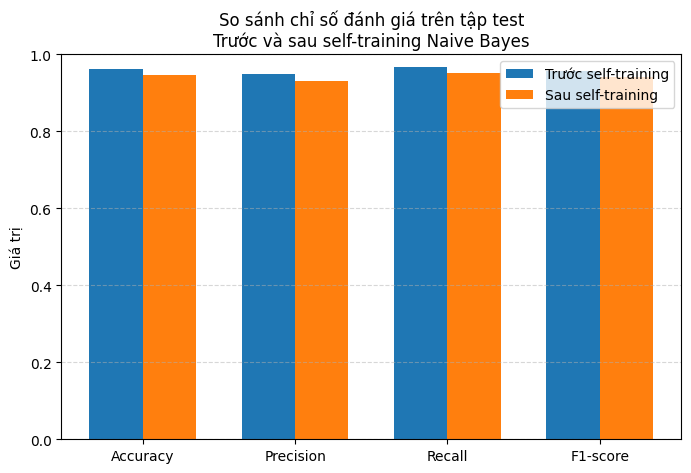

In [29]:
NB_BoW = train_model_pipeline('NB', X_train_l_bow, y_train_l, X_test_l_bow, y_test_l, X_n_bow)

## 3.4. Huấn luyện mô hình Navie Bayes kèm với pipeline TF-IDF

Số lượng nhãn sau khi gộp data:
Class 0: 1641
Class 1: 602
------------------------------
Ma trận đánh giá trước khi self-training (trước khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.9126506024096386
Độ chính xác theo nhãn (Precision - macro): 0.9017030423280423
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.8998025260213107
Điểm F1 (F1-score - macro): 0.9007412447551006
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       223
           1       0.87      0.86      0.87       109

    accuracy                           0.91       332
   macro avg       0.90      0.90      0.90       332
weighted avg       0.91      0.91      0.91       332

------------------------------------------------------------------------------------------------------------------------

Ma trận đánh giá sau khi self-training (sau khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.8975903614457831
Độ chính xác theo n

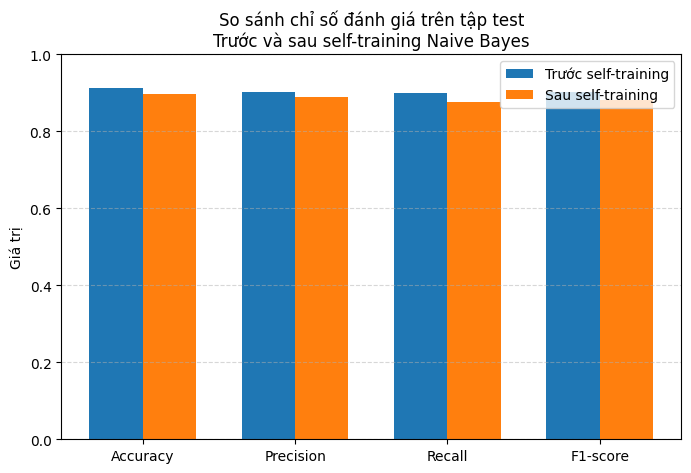

In [30]:
NB_TFIDF = train_model_pipeline('NB', X_train_l_tfidf, y_train_l, X_test_l_tfidf, y_test_l, X_n_tfidf)

# 4. Huấn luyện mô hình SVM nhận diện toxic/non bằng sklearn

## 4.1. Huấn luyện mô hình SVC với chiến lược BoW

Số lượng nhãn sau khi gộp data:
Class 0: 4702
Class 1: 568
------------------------------
Ma trận đánh giá trước khi self-training (trước khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.9819277108433735
Độ chính xác theo nhãn (Precision - macro): 0.9739130434782608
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.9865470852017937
Điểm F1 (F1-score - macro): 0.979788961038961
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       223
           1       0.95      1.00      0.97       109

    accuracy                           0.98       332
   macro avg       0.97      0.99      0.98       332
weighted avg       0.98      0.98      0.98       332

------------------------------------------------------------------------------------------------------------------------

Ma trận đánh giá sau khi self-training (sau khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.9608433734939759
Độ chính xác theo nh

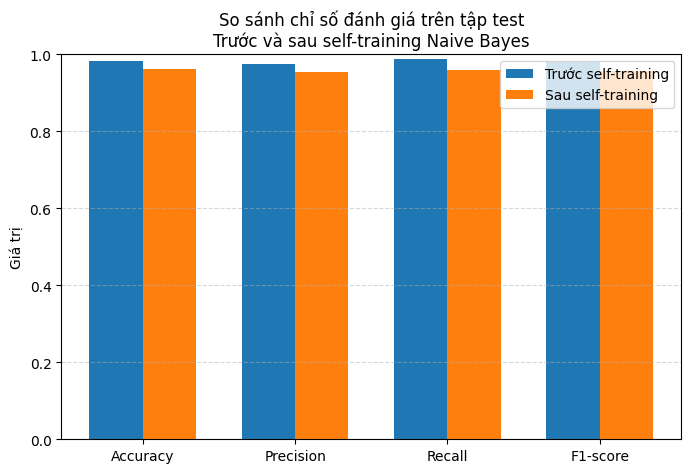

In [31]:
SVC_BOW = train_model_pipeline('SVC', X_train_l_bow, y_train_l, X_test_l_bow, y_test_l, X_n_bow)

## 4.2. Train model SVC với chiến lược TF-IDF

Số lượng nhãn sau khi gộp data:
Class 0: 4017
Class 1: 523
------------------------------
Ma trận đánh giá trước khi self-training (trước khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.9066265060240963
Độ chính xác theo nhãn (Precision - macro): 0.8934889434889435
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.8953182210885753
Điểm F1 (F1-score - macro): 0.8943922836180801
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       223
           1       0.85      0.86      0.86       109

    accuracy                           0.91       332
   macro avg       0.89      0.90      0.89       332
weighted avg       0.91      0.91      0.91       332

------------------------------------------------------------------------------------------------------------------------

Ma trận đánh giá sau khi self-training (sau khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.9066265060240963
Độ chính xác theo n

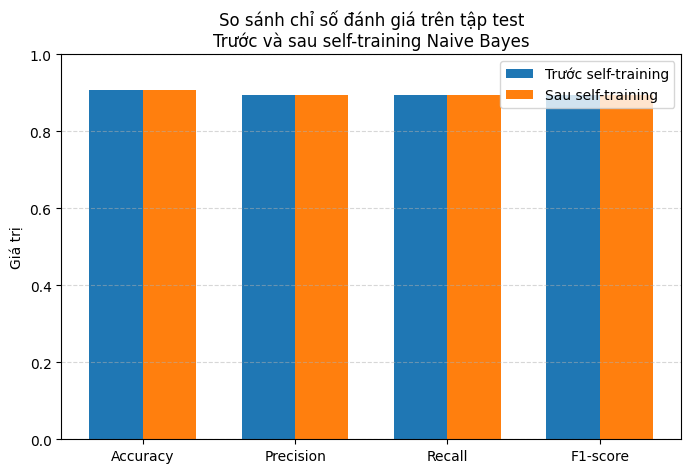

In [32]:
SVC_TFIDF = train_model_pipeline('SVC', X_train_l_tfidf, y_train_l, X_test_l_tfidf, y_test_l, X_n_tfidf)

## 4.3. Train model SVC với chiến lược embedding câu dugf PhoBert

Số lượng nhãn sau khi gộp data:
Class 0: 4132
Class 1: 492
------------------------------
Ma trận đánh giá trước khi self-training (trước khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.8975903614457831
Độ chính xác theo nhãn (Precision - macro): 0.885233644859813
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.881556753198667
Điểm F1 (F1-score - macro): 0.8833498677248677
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       223
           1       0.85      0.83      0.84       109

    accuracy                           0.90       332
   macro avg       0.89      0.88      0.88       332
weighted avg       0.90      0.90      0.90       332

------------------------------------------------------------------------------------------------------------------------

Ma trận đánh giá sau khi self-training (sau khi thêm dữ liệu tự gán nhãn):
Độ chính xác (Accuracy): 0.8945783132530121
Độ chính xác theo nhã

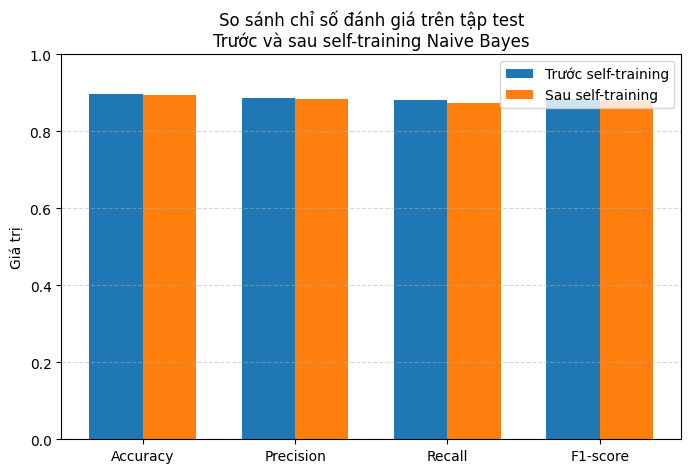

In [33]:
SVC_embedding = train_model_pipeline('SVC', X_train_l_embedding, y_train_l, X_test_l_embedding, y_test_l, X_n_embedding)

# test thu


In [33]:
# Dữ liệu bình luận đầu vào
mixed_comments = [
    "Cảm ơn thầy đã giảng bài rất hay và dễ hiểu",
    "Khóa học làm giàu online giảm giá 50% mua ngay!!! 🎉🎉🎉",
    "Em chưa hiểu phần backpropagation, thầy có thể giải thích lại được không ạ",
    "KIẾM TIỀN TẠI NHÀ 20 TRIỆU/THÁNG!!! INBOX NGAY 0912345678",
    "Bài tập tuần này khó quá thầy ơi, em làm mãi không ra",
    "Khóa học AI từ 0 đến chuyên gia chỉ 299k. Click: http://fake-course.com 💰💰",
    "Video bài giảng rất chi tiết, em đã hiểu rõ hơn về CNN rồi ạ",
    "Bán tài khoản Netflix Premium giá rẻ chỉ 50k/tháng. Liên hệ Zalo: 0987654321",
    "Các bạn làm bài 3 ra kết quả bao nhiêu vậy, mình làm mãi không đúng",
    "🔥🔥🔥 SALE SỐC Macbook Pro giảm 90% chỉ còn 5 triệu!!! Mua ngay kẻo hết",
    "Thầy ơi, deadline assignment là ngày nào vậy ạ",
    "Gia sư dạy kèm tại nhà, cam kết điểm A, giá chỉ 100k/buổi. Call: 0901234567",
    "Em làm bài tập nhưng bị lỗi ValueError, thầy xem giúp em với",
    "💎💎 Khóa học kinh doanh online BÁN CHẠY NHẤT 2024!!! Đăng ký ngay để được ưu đãi",
    "Nhóm mình họp lúc 7h tối nhé, ai đi muộn nhớ báo trước",
    "Bán acc Shopee xu 500k chỉ 50k. Uy tín 100%. Inbox mua ngay 🎁🎁🎁",
    "Ai có tài liệu tham khảo về Transformer không, share cho mình với",
    "VIỆC LÀM ONLINE TẠI NHÀ - Lương 15-30 triệu/tháng - Tuyển gấp!!! http://scam.vn",
    "Làm sao để cài đặt TensorFlow trên Mac vậy mọi người",
    "🚀🚀 Đầu tư Forex sinh lời 200%/tháng. Rút tiền bất cứ lúc nào. Tham gia: bit.ly/forex",
    "Cảm ơn bạn đã giúp mình debug, giờ code chạy được rồi",
    "MUA NGAY iPhone 15 Pro Max giá chỉ 3 triệu!!! Sale cuối năm 😱😱😱 www.fake-shop.com",
    "Buổi học hôm nay rất bổ ích, em học được nhiều kiến thức mới",
    "Khóa học tiếng Anh giao tiếp cấp tốc 1 tháng thành thạo. Giảm 80% hôm nay!!!",
    "Nên dùng Adam hay SGD optimizer cho bài này các bạn",
    "💰 Cần người làm việc tại nhà, lương 500k/ngày. Không cần kinh nghiệm. Zalo: 098xxx",
    "Accuracy của mình chỉ được 70%, có cách nào để cải thiện không",
    "🎉 KHUYẾN MÃI CỰC SỐC 🎉 Laptop Dell core i7 chỉ 4 triệu!!! Inbox đặt hàng ngay",
    "Thầy có thể cho thêm ví dụ về gradient descent không ạ",
    "Bán sim số đẹp phong thủy giá rẻ. Liên hệ: 0912.345.678 hoặc visit: simdep.vn",
    "Code này chạy được trên Colab không các bạn, mình test thử đi",
    "⚡️⚡️ FULL COURSE lập trình 100 khóa chỉ 99k trọn đời!!! Download ngay: drive.link",
    "Em cảm thấy phần này hơi khó hiểu, thầy giảng lại được không ạ",
    "Kinh doanh mỹ phẩm online thu nhập khủng. Tham gia team ngay!!! 📞 0909123456",
    "Meeting vào thứ 3 tuần sau nhé team, chuẩn bị slide trước",
    "WIN IPHONE 15!!! Chỉ cần click link và điền thông tin 👉 http://phishing.com 🎁",
    "GPU hết memory rồi, có cách nào giảm batch size không mọi người",
    "🔥 Bán tài khoản ChatGPT Plus giá sinh viên chỉ 30k/tháng. Chat Zalo: 098xxxxxx",
    "Slide bài học ở đâu thầy nhỉ, em không tìm thấy trên drive",
    "💎 Cơ hội đầu tư BẤT ĐỘNG SẢN lợi nhuận 300%/năm. Đăng ký tư vấn FREE!!!",
]

# Nhãn tương ứng với từng bình luận: 0 - bình thường, 1 - spam/quảng cáo
labels = [
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
]


# Các cột thông tin thêm vào vector đặc trưng
information_col = ['num_emoji', 'num_email', 'num_link', 'num_upper', 'Count_num']


# -------------------------- Đánh giá với pipeline BoW --------------------------

# B1: Đưa text vào DataFrame để tiện xử lý
test = pd.DataFrame(mixed_comments, columns = ['text'])

# B2: Thêm các cột thông tin số lượng (emoji, email, link, uppercase) trước khi tiền xử lý văn bản
test = create_count_col(test, 'text')   # hàm này sẽ thêm các cột: num_emoji, num_email, num_link, num_upper

# B3: Chuẩn hóa/tiền xử lý dữ liệu (bỏ dấu, thường hóa, loại bỏ stopword,...)
test['text'] = test['text'].apply(pipeline_preprocess)


# B4: Ánh xạ sang vector BoW
input_text = BoW_for_data_label.transform(test['text'])

# B5: Kết hợp vectơ BoW với thông tin đặc trưng phụ
input_data = hstack([input_text, csr_matrix(test[information_col])]) # dán 2 phần lại

# --------------------------  Dự đoán, đánh giá với model NB_BOW --------------------------
predict = NB_BoW.predict(input_data)
print('-'* 120)
print("BoW - Naive Bayes: ")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict))
print('-'* 120)

# --------------------------  Dự đoán, đánh giá với model SVC_BOW --------------------------
print('-'* 120)
predict_svc_bow = SVC_BOW.predict(input_data)
print("BoW - SVC: ")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_svc_bow))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_svc_bow, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_svc_bow, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_svc_bow, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_svc_bow))
print('-'* 120)

# -------------------------- Đánh giá với pipeline TF-IDF --------------------------


# B1: Đưa text vào DataFrame (giống pipeline BoW)
test_tfidf = pd.DataFrame(mixed_comments, columns=['text'])

# B2: Thêm các cột đếm đặc trưng thông tin trước khi xử lý văn bản
test_tfidf = create_count_col(test_tfidf, 'text')

# B3: Tiền xử lý văn bản giống pipeline training (bỏ dấu, thường hóa, loại stopword, v.v.)
test_tfidf['text'] = test_tfidf['text'].apply(pipeline_preprocess)

# B4: Vector hóa text bằng TF-IDF
input_text_tfidf = Tfidf_for_data_label.transform(test_tfidf['text']).toarray()

# B5: Kết hợp TF-IDF với các cột thông tin phụ đã tách ra
input_data_tfidf = hstack([input_text_tfidf, csr_matrix(test_tfidf[information_col])])

# --------------------------  Dự đoán, đánh giá với model NB_TFIDF --------------------------
predict_tfidf = NB_TFIDF.predict(input_data_tfidf)
print('-'* 120)
print("TF-IDF - Naive Bayes: ")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_tfidf))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_tfidf, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_tfidf, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_tfidf, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_tfidf))
print('-'* 120)


# --------------------------  Dự đoán, đánh giá với model SVC_TFIDF --------------------------
print('-'* 120)
predict_svc_tfidf = SVC_TFIDF.predict(input_data_tfidf)
print("TF-IDF - SVC: ")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_svc_tfidf))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_svc_tfidf, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_svc_tfidf, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_svc_tfidf, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_svc_tfidf))
print('-'* 120)



------------------------------------------------------------------------------------------------------------------------
BoW - Naive Bayes: 
Độ chính xác (Accuracy): 0.925
Độ chính xác theo nhãn (Precision - macro): 0.9347826086956521
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.925
Điểm F1 (F1-score - macro): 0.9245757385292269
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.87      1.00      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
BoW - SVC: 
Độ chính xác (Accuracy): 0.975
Độ chính xác theo nhãn (Preci